<a href="https://colab.research.google.com/github/alwicareer-sketch/malang-temperature-forecasting-lstm/blob/main/Bismillah_Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import tensorflow as tf

In [3]:
# Membaca Excel
excel_file = pd.read_excel('Dataset Suhu.xlsx')
df = pd.DataFrame(excel_file)

print(df)
df.info()

        Tanggal  Suhu Minimum  Suhu Maksimum  Suhu Rata-rata
0    2021-01-01          21.3           28.4            22.8
1    2021-01-02          21.6           26.4            23.7
2    2021-01-03          20.8           28.1            24.2
3    2021-01-04          21.2           27.2            23.1
4    2021-01-05          20.4           26.8            23.1
...         ...           ...            ...             ...
1456 2024-12-27          21.8           29.8            25.0
1457 2024-12-28          21.9           28.8            23.5
1458 2024-12-29          21.8           26.6            23.1
1459 2024-12-30          20.8           29.7            24.3
1460 2024-12-31          21.1           28.8            24.6

[1461 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tanggal         1461 non-nul

In [4]:
# Deskriptif data sebelum preprocessing
desc = df.describe()
print(desc)

                             Tanggal  Suhu Minimum  Suhu Maksimum  \
count                           1461   1455.000000    1461.000000   
mean   2023-01-01 00:00:00.000000256     20.185911      29.281930   
min              2021-01-01 00:00:00     14.600000      24.500000   
25%              2022-01-01 00:00:00     19.600000      28.400000   
50%              2023-01-01 00:00:00     20.400000      29.300000   
75%              2024-01-01 00:00:00     21.200000      30.000000   
max              2024-12-31 00:00:00     23.400000      34.000000   
std                              NaN      1.387179       1.392505   

       Suhu Rata-rata  
count     1459.000000  
mean        24.448732  
min         20.100000  
25%         23.600000  
50%         24.300000  
75%         25.300000  
max         28.800000  
std          1.243806  


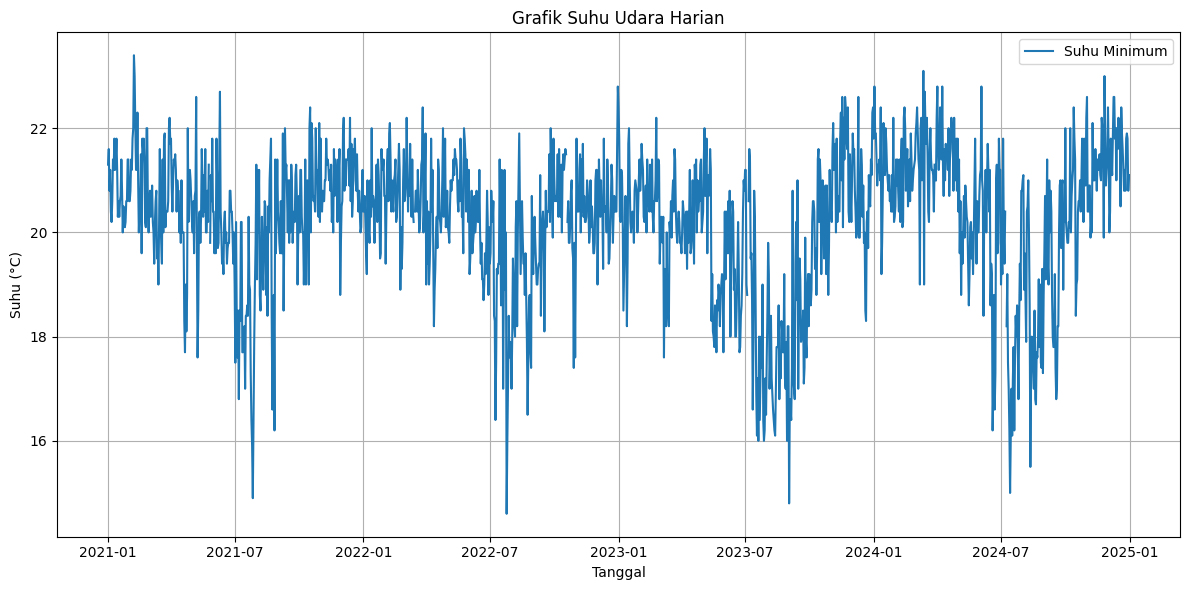

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Tanggal'], df['Suhu Minimum'], label='Suhu Minimum')

plt.xlabel('Tanggal')
plt.ylabel('Suhu (°C)')
plt.title('Grafik Suhu Udara Harian')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

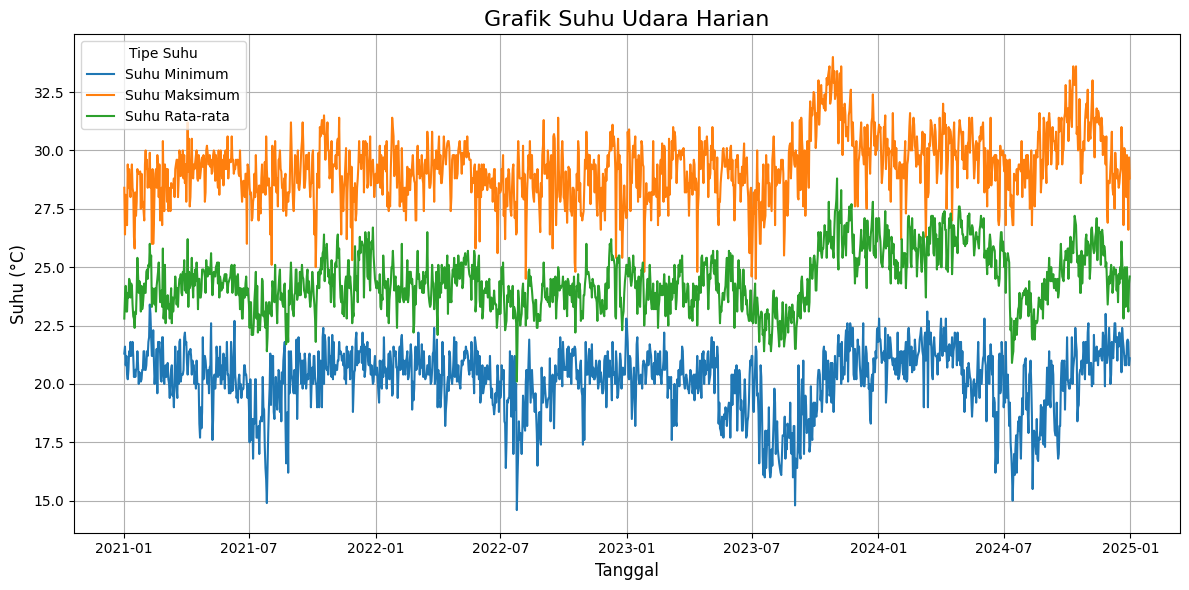

In [6]:
# Mengubah dataset menjadi format long untuk seaborn
dataset_long1 = df.melt(id_vars='Tanggal',
                            value_vars=['Suhu Minimum', 'Suhu Maksimum', 'Suhu Rata-rata'],
                            var_name='Tipe Suhu',
                            value_name='Suhu')

# Membuat plot menggunakan seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataset_long1, x='Tanggal', y='Suhu', hue='Tipe Suhu')

# Menambahkan judul dan label
plt.title('Grafik Suhu Udara Harian', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Suhu (°C)', fontsize=12)
plt.legend(title='Tipe Suhu')
plt.grid(True)
plt.tight_layout()

# Menampilkan grafik
plt.show()

In [7]:
# Mengecek apakah ada missing value
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

# Mengecek apakah ada missing value secara keseluruhan
print("\nApakah ada missing value di dataset?")
print(df.isnull().values.any())

# Menampilkan baris yang mengandung missing value
print("\nBaris dengan missing value:")
print(df[df.isnull().any(axis=1)])

Jumlah missing value per kolom:
Tanggal           0
Suhu Minimum      6
Suhu Maksimum     0
Suhu Rata-rata    2
dtype: int64

Apakah ada missing value di dataset?
True

Baris dengan missing value:
        Tanggal  Suhu Minimum  Suhu Maksimum  Suhu Rata-rata
145  2021-05-26           NaN           29.8             NaN
438  2022-03-15           NaN           29.4            24.8
656  2022-10-19           NaN           27.7            23.4
915  2023-07-05           NaN           27.3            23.7
1183 2024-03-29           NaN           30.0            25.6
1284 2024-07-08           NaN           28.3             NaN


In [8]:
# Preprocessing (Handling Missing Value)
df_interpolate = df.interpolate()
print(df_interpolate)
df_interpolate.to_excel('Dataset_fix.xlsx', index=False)

        Tanggal  Suhu Minimum  Suhu Maksimum  Suhu Rata-rata
0    2021-01-01          21.3           28.4            22.8
1    2021-01-02          21.6           26.4            23.7
2    2021-01-03          20.8           28.1            24.2
3    2021-01-04          21.2           27.2            23.1
4    2021-01-05          20.4           26.8            23.1
...         ...           ...            ...             ...
1456 2024-12-27          21.8           29.8            25.0
1457 2024-12-28          21.9           28.8            23.5
1458 2024-12-29          21.8           26.6            23.1
1459 2024-12-30          20.8           29.7            24.3
1460 2024-12-31          21.1           28.8            24.6

[1461 rows x 4 columns]


In [9]:
#Membaca dataset baru
excel1 = pd.read_excel('Dataset_fix.xlsx')
df1 = pd.DataFrame(excel1)

print(df1)

        Tanggal  Suhu Minimum  Suhu Maksimum  Suhu Rata-rata
0    2021-01-01          21.3           28.4            22.8
1    2021-01-02          21.6           26.4            23.7
2    2021-01-03          20.8           28.1            24.2
3    2021-01-04          21.2           27.2            23.1
4    2021-01-05          20.4           26.8            23.1
...         ...           ...            ...             ...
1456 2024-12-27          21.8           29.8            25.0
1457 2024-12-28          21.9           28.8            23.5
1458 2024-12-29          21.8           26.6            23.1
1459 2024-12-30          20.8           29.7            24.3
1460 2024-12-31          21.1           28.8            24.6

[1461 rows x 4 columns]


In [10]:
#Deskriptif data
deskriptif = df1.describe()
print(deskriptif)

                             Tanggal  Suhu Minimum  Suhu Maksimum  \
count                           1461   1461.000000    1461.000000   
mean   2023-01-01 00:00:00.000000256     20.186413      29.281930   
min              2021-01-01 00:00:00     14.600000      24.500000   
25%              2022-01-01 00:00:00     19.600000      28.400000   
50%              2023-01-01 00:00:00     20.400000      29.300000   
75%              2024-01-01 00:00:00     21.200000      30.000000   
max              2024-12-31 00:00:00     23.400000      34.000000   
std                              NaN      1.384953       1.392505   

       Suhu Rata-rata  
count     1461.000000  
mean        24.449452  
min         20.100000  
25%         23.600000  
50%         24.300000  
75%         25.300000  
max         28.800000  
std          1.243206  


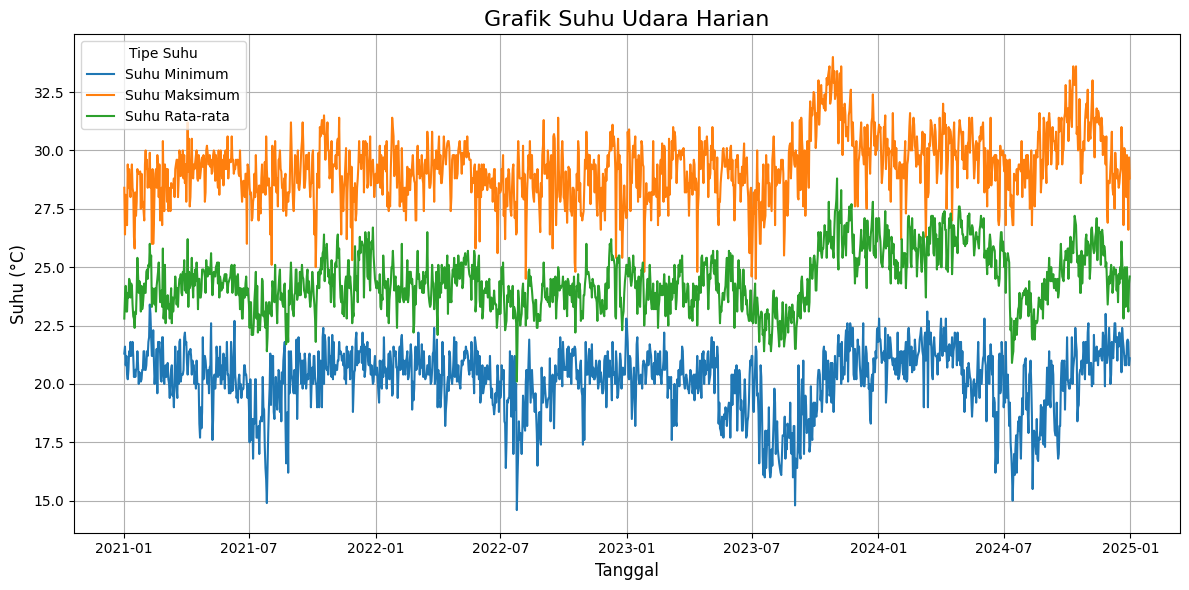

In [11]:
# Mengubah dataset menjadi format long untuk seaborn
dataset_long = df1.melt(id_vars='Tanggal',
                            value_vars=['Suhu Minimum', 'Suhu Maksimum', 'Suhu Rata-rata'],
                            var_name='Tipe Suhu',
                            value_name='Suhu')

# Membuat plot menggunakan seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataset_long, x='Tanggal', y='Suhu', hue='Tipe Suhu')

# Menambahkan judul dan label
plt.title('Grafik Suhu Udara Harian', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Suhu (°C)', fontsize=12)
plt.legend(title='Tipe Suhu')
plt.grid(True)
plt.tight_layout()

# Menampilkan grafik
plt.show()

In [12]:
#memisahkan fitur input dan output
input_features = ['Suhu Minimum', 'Suhu Maksimum', 'Suhu Rata-rata']
output_features = ['Suhu Minimum', 'Suhu Maksimum', 'Suhu Rata-rata']

In [13]:
X = df1[input_features].values
y = df1[output_features].values

In [14]:
print(X)
print(y)

[[21.3 28.4 22.8]
 [21.6 26.4 23.7]
 [20.8 28.1 24.2]
 ...
 [21.8 26.6 23.1]
 [20.8 29.7 24.3]
 [21.1 28.8 24.6]]
[[21.3 28.4 22.8]
 [21.6 26.4 23.7]
 [20.8 28.1 24.2]
 ...
 [21.8 26.6 23.1]
 [20.8 29.7 24.3]
 [21.1 28.8 24.6]]


In [15]:
#Normalisasi
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)
print(X_scaled)
print(y_scaled)

[[0.76136364 0.41052632 0.31034483]
 [0.79545455 0.2        0.4137931 ]
 [0.70454545 0.37894737 0.47126437]
 ...
 [0.81818182 0.22105263 0.34482759]
 [0.70454545 0.54736842 0.48275862]
 [0.73863636 0.45263158 0.51724138]]
[[0.76136364 0.41052632 0.31034483]
 [0.79545455 0.2        0.4137931 ]
 [0.70454545 0.37894737 0.47126437]
 ...
 [0.81818182 0.22105263 0.34482759]
 [0.70454545 0.54736842 0.48275862]
 [0.73863636 0.45263158 0.51724138]]


In [16]:
pd.DataFrame(X_scaled).to_excel('X_scaled.xlsx', index=False)

In [17]:
# Set seed agar hasil tetap sama tiap run
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

In [19]:
timesteps = 30 #menggunakan 30 hari sebelumnya menjadi input lstm
n_features_input = len(input_features)
n_features_output = len(output_features)

In [20]:
def create_sequences(X, y, time_steps):
  X_seq, y_seq = [], []

  for i in range(len(X) - time_steps):
    X_seq.append(X[i : i + time_steps])
    y_seq.append(y[i + timesteps])
  return np.array(X_seq), np.array(y_seq)

X_train_seq, y_train_seq = create_sequences(X_train, y_train, timesteps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, timesteps)

In [21]:
model = Sequential()
model.add(LSTM(50, input_shape=(timesteps, n_features_input), return_sequences = True, recurrent_activation='sigmoid', activation='tanh'))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(n_features_output))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer='rmsprop', loss='mse')

In [23]:
hist = model.fit(X_train_seq, y_train_seq, batch_size = 16, epochs=200, validation_data=(X_test_seq, y_test_seq))

Epoch 1/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0521 - val_loss: 0.0176
Epoch 2/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0196 - val_loss: 0.0176
Epoch 3/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0171 - val_loss: 0.0179
Epoch 4/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0164 - val_loss: 0.0188
Epoch 5/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0160 - val_loss: 0.0170
Epoch 6/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0158 - val_loss: 0.0159
Epoch 7/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0152 - val_loss: 0.0155
Epoch 8/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0150 - val_loss: 0.0146
Epoch 9/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0143 - val_loss: 0.0152
Epoch 10/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0148 - val_loss: 0.0149
Epoch 11/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - val_loss: 0.0151
Epoch 12/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step

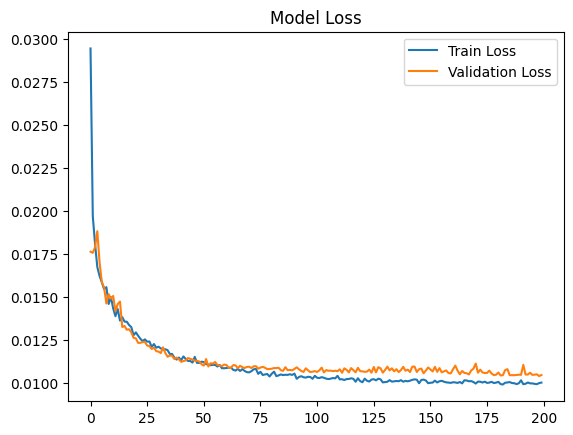

In [24]:
model_history = hist.history
loss = model_history['loss']
val_loss = model_history['val_loss']

plt.figure()
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,308 (243.39 KB)

 Trainable params: 31,153 (121.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,155 (121.70 KB)

In [26]:
predictions = model.predict(X_test_seq)
predictions = scaler.inverse_transform(predictions)
y_test_asli = scaler.inverse_transform(y_test_seq)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


In [27]:
print(y_test_asli)
print(predictions)

[[21.7 30.3 27.1]
 [21.4 30.9 26.7]
 [21.6 30.8 27.3]
 [21.2 30.4 26.9]
 [22.  27.  24.7]
 [20.7 29.2 25.5]
 [21.4 30.6 26.8]
 [21.6 31.2 26.7]
 [22.2 29.8 25.9]
 [22.  30.  26.3]
 [22.  29.6 26.1]
 [20.8 29.6 26.2]
 [22.2 28.4 25.6]
 [21.2 30.  27. ]
 [21.  30.8 27.6]
 [21.8 31.3 27.6]
 [20.8 31.  27.3]
 [21.8 30.8 26.7]
 [20.4 30.6 27. ]
 [21.4 29.6 26.4]
 [19.6 30.8 26.4]
 [20.6 29.2 26. ]
 [18.8 29.6 26.1]
 [20.  29.2 25.9]
 [19.4 30.2 26.3]
 [20.1 30.1 26. ]
 [20.7 28.8 26.1]
 [19.9 30.3 27.2]
 [20.9 30.4 26.8]
 [20.6 31.4 27.3]
 [20.3 29.9 26.4]
 [20.2 31.  26.4]
 [19.4 31.  26.4]
 [18.6 31.4 26.8]
 [19.2 30.6 26.7]
 [20.1 29.8 26.3]
 [20.2 28.8 25.5]
 [19.5 29.2 25.8]
 [20.  30.2 26.2]
 [19.2 30.4 26.5]
 [19.9 29.6 26.2]
 [20.8 30.3 26.3]
 [21.8 28.6 26. ]
 [20.3 29.6 25.8]
 [19.4 30.6 26.6]
 [20.6 30.4 26.8]
 [20.  31.  27.2]
 [20.  30.5 26.8]
 [20.7 31.  26.7]
 [21.1 31.2 26.7]
 [21.2 30.  27.1]
 [22.8 28.2 25.4]
 [21.  30.1 25.7]
 [20.8 29.  25.7]
 [18.4 29.  25.3]
 [20.4 27.

In [28]:
for i, feature in enumerate(['Suhu Minimum', 'Suhu Maksimum', 'Suhu Rata-rata']):
  MAPE = np.mean(np.abs((y_test_asli[:, i] - predictions[:, i]) / y_test_asli[:, i])) * 100
  print(f'MAPE untuk {feature}: {MAPE:.2f}%')

MAPE untuk Suhu Minimum: 4.14%
MAPE untuk Suhu Maksimum: 2.66%
MAPE untuk Suhu Rata-rata: 2.16%


In [29]:
for i, feature in enumerate(['Suhu Minimum', 'Suhu Maksimum', 'Suhu Rata-rata']):
  RMSE = np.sqrt(np.mean((y_test_asli[:, i] - predictions[:, i])**2))
  print(f'RMSE untuk {feature}: {RMSE:.2f}')

RMSE untuk Suhu Minimum: 1.04
RMSE untuk Suhu Maksimum: 1.00
RMSE untuk Suhu Rata-rata: 0.69


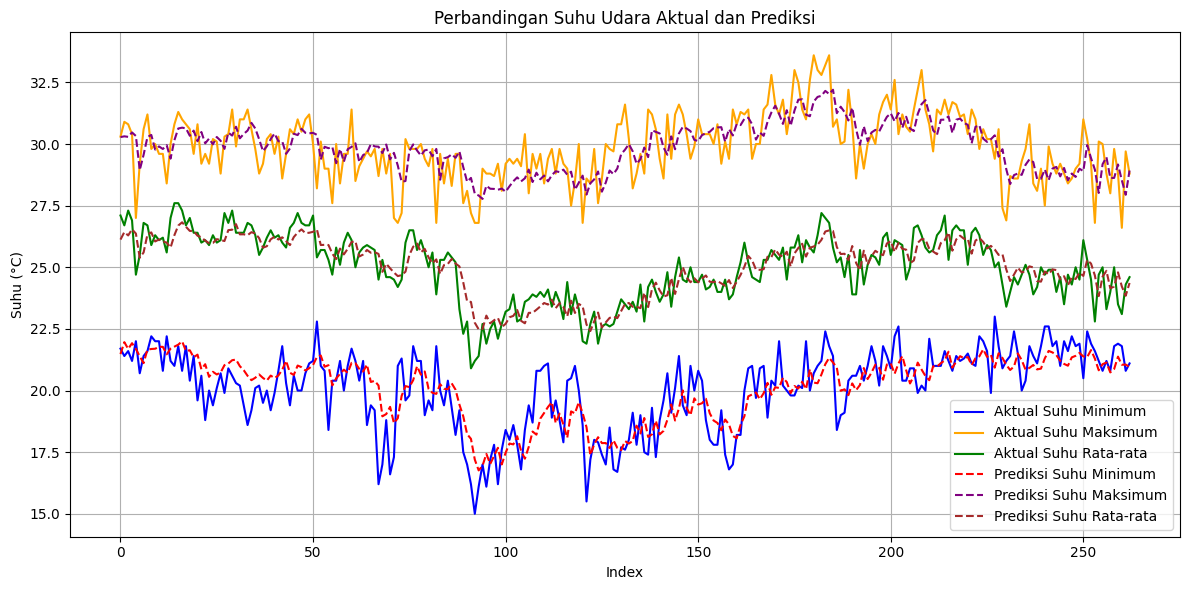

In [30]:
# Grafik perbandingan data aktual dan data peramalan
plt.figure(figsize=(12, 6))  # Mengatur ukuran figure

# Plot data aktual untuk setiap kategori suhu
plt.plot(y_test_asli[:, 0], label='Aktual Suhu Minimum', color='blue')
plt.plot(y_test_asli[:, 1], label='Aktual Suhu Maksimum', color='orange')
plt.plot(y_test_asli[:, 2], label='Aktual Suhu Rata-rata', color='green')

# Plot data peramalan untuk setiap kategori suhu
plt.plot(predictions[:, 0], label='Prediksi Suhu Minimum', color='red', linestyle='--')
plt.plot(predictions[:, 1], label='Prediksi Suhu Maksimum', color='purple', linestyle='--')
plt.plot(predictions[:, 2], label='Prediksi Suhu Rata-rata', color='brown', linestyle='--')

plt.xlabel('Index')
plt.ylabel('Suhu (°C)')
plt.title('Perbandingan Suhu Udara Aktual dan Prediksi')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [31]:
# Fungsi prediksi masa depan untuk semua fitur
def predict_future(model, last_sequence, n_future, scaler):
    preds_scaled = []
    current_seq = last_sequence.copy()

    for _ in range(n_future):
        pred_scaled = model.predict(current_seq.reshape(1, timesteps, n_features_input), verbose=0)[0]
        preds_scaled.append(pred_scaled)

        # Geser window, tambahkan prediksi
        current_seq = np.vstack([current_seq[1:], pred_scaled])

    preds_scaled = np.array(preds_scaled)
    preds = scaler.inverse_transform(preds_scaled)
    return preds

# Ambil 30 hari terakhir dari keseluruhan data (X_scaled)
last_30_days = X_scaled[-timesteps:]

# Tentukan jumlah hari ke depan
n_future_days = 59  # Prediksi 59 hari ke depan

# Prediksi masa depan
future_predictions = predict_future(model, last_30_days, n_future_days, scaler)

# Buat DataFrame hasil prediksi dengan tanggal
future_dates = pd.date_range(start=df1['Tanggal'].max() + pd.Timedelta(days=1), periods=n_future_days)
df_future = pd.DataFrame(future_predictions, columns=['Suhu Minimum', 'Suhu Maksimum', 'Suhu Rata-rata'])
df_future['Tanggal'] = future_dates

# Simpan ke Excel
df_future.to_excel('Prediksi_Masa_Depan.xlsx', index=False)

# Tampilkan hasil prediksi
print(df_future)


    Suhu Minimum  Suhu Maksimum  Suhu Rata-rata    Tanggal
0      21.213949      28.959169       24.555792 2025-01-01
1      21.187786      28.908150       24.535723 2025-01-02
2      21.146883      28.895376       24.523291 2025-01-03
3      21.103159      28.903854       24.519804 2025-01-04
4      21.067358      28.917128       24.525097 2025-01-05
5      21.034477      28.942972       24.537382 2025-01-06
6      21.006655      28.976067       24.555365 2025-01-07
7      20.986687      29.009083       24.577406 2025-01-08
8      20.967161      29.046122       24.600887 2025-01-09
9      20.959009      29.070000       24.625055 2025-01-10
10     20.954531      29.094704       24.649929 2025-01-11
11     20.952478      29.114166       24.673672 2025-01-12
12     20.953831      29.134245       24.698057 2025-01-13
13     20.956863      29.146740       24.720381 2025-01-14
14     20.958366      29.165602       24.742458 2025-01-15
15     20.960344      29.179665       24.762939 2025-01-

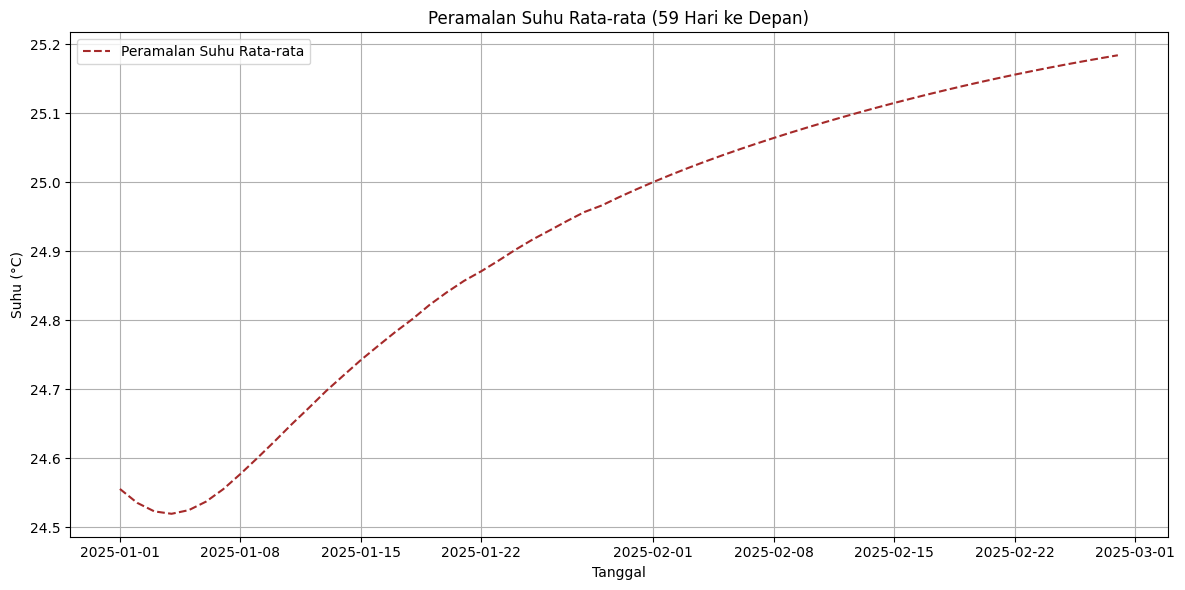

In [32]:
# Plot prediksi masa depan
plt.figure(figsize=(12, 6))

plt.plot(df_future['Tanggal'], df_future['Suhu Rata-rata'], label='Peramalan Suhu Rata-rata', color='brown', linestyle='--')

plt.xlabel('Tanggal')
plt.ylabel('Suhu (°C)')
plt.title(f'Peramalan Suhu Rata-rata ({n_future_days} Hari ke Depan)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

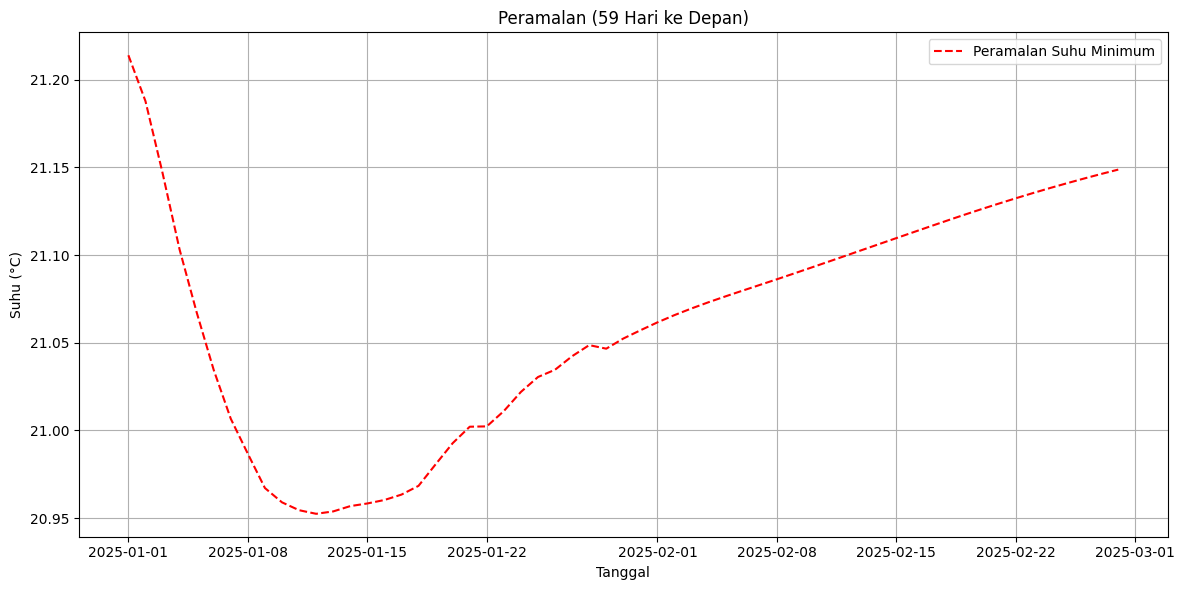

In [33]:
# Plot prediksi masa depan
plt.figure(figsize=(12, 6))

plt.plot(df_future['Tanggal'], df_future['Suhu Minimum'], label='Peramalan Suhu Minimum', color='red', linestyle='--')

plt.xlabel('Tanggal')
plt.ylabel('Suhu (°C)')
plt.title(f'Peramalan ({n_future_days} Hari ke Depan)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

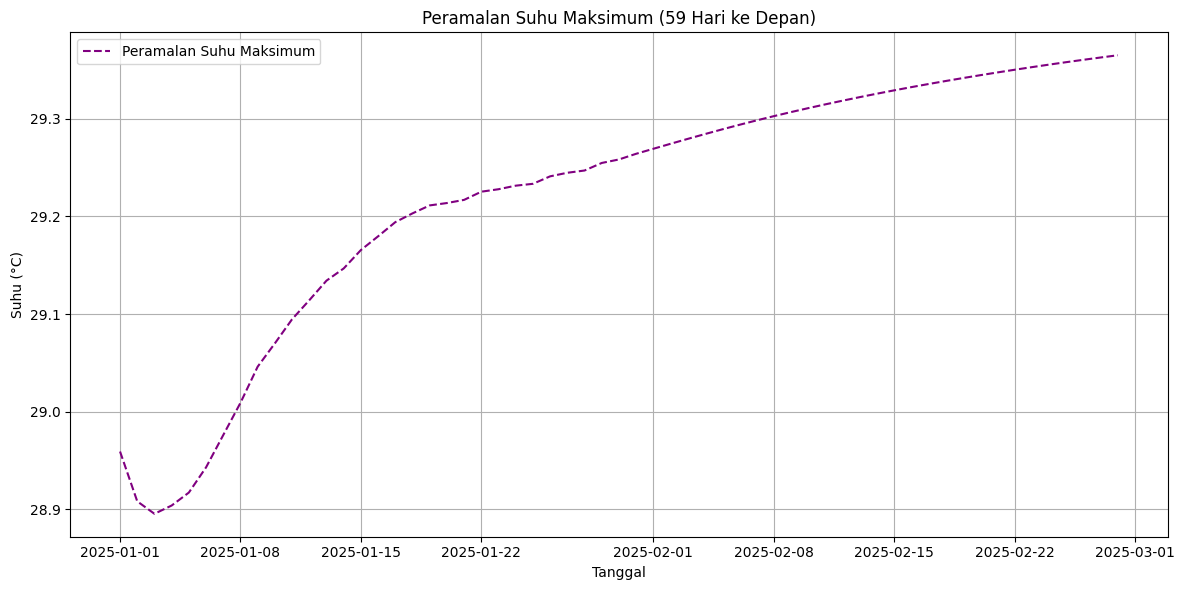

In [34]:
# Plot prediksi masa depan
plt.figure(figsize=(12, 6))

plt.plot(df_future['Tanggal'], df_future['Suhu Maksimum'], label='Peramalan Suhu Maksimum', color='purple', linestyle='--')

plt.xlabel('Tanggal')
plt.ylabel('Suhu (°C)')
plt.title(f'Peramalan Suhu Maksimum ({n_future_days} Hari ke Depan)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

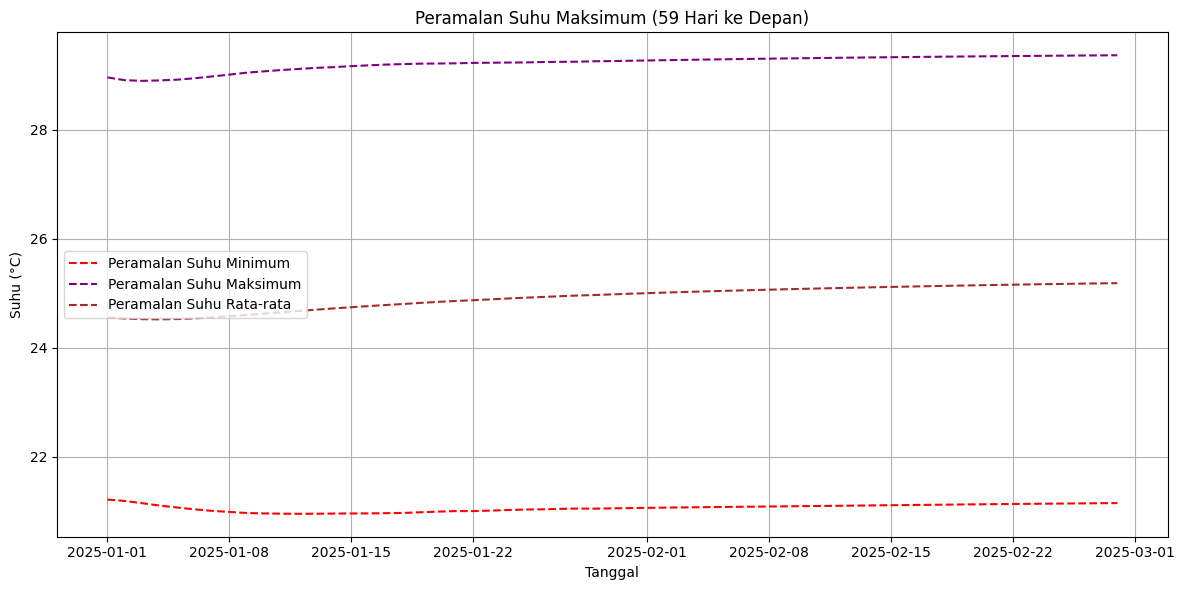

In [35]:
# Plot Gabungan Peramalan Suhu Udara 59 Hari ke Depan
plt.figure(figsize=(12, 6))

plt.plot(df_future['Tanggal'], df_future['Suhu Minimum'], label='Peramalan Suhu Minimum', color='red', linestyle='--')
plt.plot(df_future['Tanggal'], df_future['Suhu Maksimum'], label='Peramalan Suhu Maksimum', color='purple', linestyle='--')
plt.plot(df_future['Tanggal'], df_future['Suhu Rata-rata'], label='Peramalan Suhu Rata-rata', color='brown', linestyle='--')

plt.xlabel('Tanggal')
plt.ylabel('Suhu (°C)')
plt.title(f'Peramalan Suhu Maksimum ({n_future_days} Hari ke Depan)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [36]:
columns = ['Suhu Minimum', 'Suhu Maksimum', 'Suhu Rata-rata']
df2 = pd.DataFrame(predictions, columns=columns)
df2.to_excel('Prediksi.xlsx', index=False)

In [37]:
lstm_layer = model.layers[0]
weights = lstm_layer.get_weights()

In [38]:
W, U, b = weights

In [39]:
print("Bobot input ke LSTM (W):\n", W)
print("\nBobot recurrent (U):\n", U)
print("\nBias (b):\n", b)

Bobot input ke LSTM (W):
 [[ 1.18393995e-01  1.16235659e-01 -8.17238986e-02  1.47973254e-01
  -1.18364483e-01  8.17520022e-02  2.48608068e-01 -1.77004188e-02
   5.84928095e-02  1.00271069e-01 -8.58537778e-02 -4.22979258e-02
   1.67862564e-01  1.66784544e-02 -9.21883248e-03 -8.39079693e-02
  -1.77246302e-01 -1.23543620e-01 -7.83208571e-03 -1.38993725e-01
  -1.58107847e-01  9.60167348e-02  1.63196295e-01 -6.27256855e-02
   2.02884272e-01 -6.72823787e-02 -2.96684746e-02  1.28204495e-01
   1.41828842e-02 -8.80893692e-02 -6.80650175e-02  1.52626574e-01
  -1.21987879e-01 -4.91109453e-02 -3.04160248e-02 -7.05425218e-02
   4.00002412e-02 -1.12029977e-01  5.03328145e-02  6.32654428e-02
  -1.15605906e-01  1.43475402e-02 -5.10334857e-02 -6.64479434e-02
   1.12066336e-01 -4.76631671e-02 -3.58970650e-03  1.20585620e-01
  -1.63103387e-01  4.98071872e-02  2.39890418e-03  2.45081633e-02
  -2.05838397e-01 -1.52089089e-01  2.88717635e-02  4.35849763e-02
  -2.31738567e-01 -1.77470967e-01 -2.51979232e-01 

In [40]:
W[:,0:50] #Bobot forget gate

array([[ 0.11839399,  0.11623566, -0.0817239 ,  0.14797325, -0.11836448,
         0.081752  ,  0.24860807, -0.01770042,  0.05849281,  0.10027107,
        -0.08585378, -0.04229793,  0.16786256,  0.01667845, -0.00921883,
        -0.08390797, -0.1772463 , -0.12354362, -0.00783209, -0.13899373,
        -0.15810785,  0.09601673,  0.1631963 , -0.06272569,  0.20288427,
        -0.06728238, -0.02966847,  0.1282045 ,  0.01418288, -0.08808937,
        -0.06806502,  0.15262657, -0.12198788, -0.04911095, -0.03041602,
        -0.07054252,  0.04000024, -0.11202998,  0.05033281,  0.06326544,
        -0.11560591,  0.01434754, -0.05103349, -0.06644794,  0.11206634,
        -0.04766317, -0.00358971,  0.12058562, -0.16310339,  0.04980719],
       [-0.11363716,  0.06448779,  0.00485009,  0.07667188, -0.00883212,
        -0.0911392 ,  0.10100827,  0.04336157,  0.00912786,  0.18279704,
         0.05673856, -0.08048535, -0.09188932,  0.10874648, -0.10124834,
         0.21787886,  0.0078676 , -0.1131778 ,  0.

In [41]:
b[0:50] #Bias forget gate

array([ 0.04125158,  0.1633754 , -0.03432791,  0.0306549 ,  0.05878751,
        0.16016328,  0.27809185,  0.22263762,  0.14628197,  0.14271806,
        0.16426614,  0.0461133 ,  0.03456185,  0.13194342,  0.01509101,
        0.01236754, -0.00597976,  0.08506853,  0.01490023,  0.09611756,
        0.0341023 ,  0.04871388, -0.00417048,  0.13652408,  0.2609923 ,
        0.12176275,  0.07877614,  0.32676953,  0.03988478,  0.06023019,
        0.11513016,  0.06068144,  0.09351845, -0.03373725,  0.09356168,
        0.13907595, -0.03527051,  0.04331324,  0.08343757,  0.13317232,
        0.06388737, -0.01751437,  0.08722553, -0.03002273,  0.02913472,
       -0.02240167, -0.05008448,  0.15682772, -0.05007026, -0.02701266],
      dtype=float32)

In [42]:
U[:,0:50] #Bobot forget gate

array([[-0.00265825, -0.06209164,  0.05590932, ..., -0.02964551,
        -0.10000843, -0.05144742],
       [-0.00735826, -0.00030334, -0.01282644, ..., -0.0658249 ,
        -0.00663411,  0.12286549],
       [-0.05647321, -0.01093933,  0.02222665, ..., -0.01005393,
        -0.06891432, -0.01104323],
       ...,
       [-0.01856711, -0.09297017,  0.02123879, ...,  0.15544611,
        -0.07600423, -0.04100499],
       [ 0.12946318, -0.04638682, -0.01282186, ...,  0.00957024,
         0.05363297,  0.15024188],
       [-0.06126169,  0.02501218,  0.07854023, ..., -0.0275714 ,
        -0.12232535,  0.03835864]], dtype=float32)

In [43]:
W[:,50:100] #Bobot input gate

array([[ 0.0023989 ,  0.02450816, -0.2058384 , -0.15208909,  0.02887176,
         0.04358498, -0.23173857, -0.17747097, -0.25197923, -0.28822923,
        -0.01104499, -0.01152569, -0.09948929, -0.02503777, -0.12715432,
        -0.0180803 , -0.07672983, -0.14100404,  0.06272785,  0.0607842 ,
        -0.00443433,  0.04375415,  0.16408324, -0.19853707, -0.09512767,
        -0.2190918 ,  0.04930594, -0.08445548, -0.05166785, -0.16634221,
        -0.1793559 ,  0.10921186, -0.22664092, -0.12480008, -0.13170482,
        -0.16703182,  0.05934729,  0.04659699, -0.05317094, -0.11801076,
         0.03379167,  0.03545047, -0.0891076 , -0.16581124,  0.03891006,
        -0.08002038,  0.0925046 ,  0.2494899 , -0.10016945, -0.20090598],
       [-0.06460579,  0.02420792, -0.05128647, -0.17108007,  0.14633028,
         0.09764285,  0.06301507, -0.20652254,  0.00790555, -0.03199544,
        -0.14874305, -0.03741305,  0.13416809, -0.08393648, -0.2090202 ,
         0.37119603, -0.06410678, -0.02298627,  0.

In [44]:
b[50:100] #Bias input gate

array([0.96303445, 1.007152  , 0.94339895, 0.9530769 , 0.87368953,
       0.922851  , 0.7701098 , 0.8157824 , 0.8586175 , 0.8011944 ,
       0.8379286 , 0.85462725, 0.89674956, 0.8132889 , 0.9125647 ,
       1.0166268 , 0.9848061 , 0.8618323 , 0.90007967, 0.9117023 ,
       0.87334746, 0.8753004 , 0.99821275, 0.85782623, 0.8151447 ,
       0.88985157, 0.85091794, 0.76273113, 0.9190397 , 0.88875276,
       0.87928325, 0.89721364, 0.9091884 , 0.90159893, 0.9184889 ,
       0.8914038 , 0.9264209 , 0.91016126, 0.88879406, 0.84539896,
       1.0300032 , 0.9257489 , 0.9094259 , 0.9346318 , 0.89035845,
       0.93549854, 0.9389203 , 1.0899241 , 0.89667857, 0.92622256],
      dtype=float32)

In [45]:
U[:,50:100] #Bobot input gate

array([[ 0.03089781,  0.06698167, -0.14733665, ..., -0.06650019,
         0.01932506, -0.09365727],
       [-0.12347566, -0.00381049,  0.02683998, ..., -0.15221247,
        -0.02366031,  0.14671928],
       [-0.12903234,  0.05002548,  0.0012462 , ..., -0.05275031,
        -0.07328942,  0.04715238],
       ...,
       [-0.00590128,  0.05580962, -0.06528182, ..., -0.14955658,
        -0.14156798,  0.04475538],
       [ 0.03818676,  0.09187675, -0.07203452, ...,  0.01743377,
        -0.03423642,  0.14304544],
       [ 0.04373273, -0.04881063,  0.07135395, ...,  0.12880115,
        -0.17734928,  0.09283511]], dtype=float32)

In [46]:
W[:,100:150] #Bobot candidate

array([[ 0.22016668,  0.09914058, -0.02103647, -0.17956698, -0.09154016,
         0.05070709, -0.2663489 , -0.12258946,  0.12417865, -0.08563883,
        -0.16318177, -0.07062455, -0.03509392,  0.19307451, -0.14213103,
        -0.17216614,  0.19691576, -0.16885422, -0.14392051, -0.14383891,
        -0.02240552, -0.23756576, -0.20401877,  0.2164427 ,  0.26850212,
        -0.16965204,  0.25649372, -0.3175331 , -0.03889993, -0.09896626,
         0.10002711, -0.16942306,  0.18144253,  0.00552779, -0.14826919,
        -0.1724436 ,  0.02157208,  0.12096811,  0.26179448, -0.16798268,
        -0.16435404, -0.10999915,  0.2329162 ,  0.14567088,  0.17735815,
         0.11435428,  0.01238128,  0.18332124, -0.01517846, -0.07755356],
       [ 0.04664131,  0.03825082,  0.15392879, -0.04044324, -0.1406334 ,
        -0.22506885,  0.21762761,  0.14876825,  0.11333849, -0.03037171,
         0.08228572,  0.25789616,  0.13703494, -0.04971069,  0.22097737,
         0.20480469,  0.16837914,  0.05010537, -0.

In [47]:
b[100:150] #Bias candidate

array([-0.0900112 , -0.2015605 , -0.09125414,  0.07748443,  0.15696567,
       -0.07392561, -0.00732306,  0.13178013, -0.12494715, -0.02987203,
        0.09329543, -0.1358397 , -0.10028981, -0.13255449,  0.0357631 ,
       -0.09793096, -0.1017974 ,  0.13384657,  0.10266825,  0.15328917,
        0.11119413,  0.05945144,  0.03920553, -0.1465561 , -0.05896454,
        0.02041689, -0.07873382, -0.04307725, -0.07928778,  0.1731328 ,
       -0.20520338,  0.10066132,  0.0879906 , -0.05957925,  0.01279317,
        0.15462394,  0.06407814,  0.00607793, -0.04559332,  0.07110753,
        0.13224967, -0.01048683,  0.05261749, -0.09489901,  0.07417331,
        0.02271024, -0.12533952, -0.20361643,  0.10835687,  0.03085224],
      dtype=float32)

In [48]:
U[:,100:150] #Bobot candidate

array([[-0.21571234, -0.01135009,  0.0409787 , ...,  0.15369695,
         0.08697998,  0.03715596],
       [-0.08334824,  0.02668892,  0.18108338, ...,  0.17818856,
        -0.08414471, -0.02393967],
       [ 0.02694334,  0.07041958, -0.1196482 , ...,  0.03982326,
         0.06787974, -0.00647399],
       ...,
       [ 0.12539287, -0.09346634,  0.03094648, ...,  0.23063561,
        -0.01138554,  0.01445084],
       [-0.15945315,  0.01613016, -0.00453185, ..., -0.04576783,
        -0.21249698,  0.06274971],
       [-0.01661452, -0.01103458, -0.12818262, ...,  0.02060862,
         0.04766864, -0.13853616]], dtype=float32)

In [49]:
W[:,150:200] #Bobot output

array([[ 0.0423382 ,  0.3387982 , -0.16245557, -0.03635909, -0.00148382,
        -0.0991267 ,  0.2138883 ,  0.06775533,  0.1709366 ,  0.18303134,
         0.12012278, -0.01784697, -0.1569564 ,  0.21597916,  0.1589689 ,
        -0.2602512 ,  0.12797274, -0.03387275,  0.09389781, -0.08511543,
        -0.06969147,  0.01236291, -0.01410712,  0.00899611,  0.01731465,
         0.18504961,  0.0029996 ,  0.06464071,  0.09041115, -0.11634894,
         0.0476643 ,  0.19661526, -0.1596612 , -0.17089029, -0.0451806 ,
         0.09293667, -0.02484323, -0.13234392, -0.09303059, -0.05639962,
         0.12171924, -0.16069868, -0.01783237,  0.06786652,  0.12358005,
         0.10953827, -0.0566952 ,  0.13707052,  0.06251945,  0.02687892],
       [ 0.00267609, -0.01166224,  0.13841835, -0.0053486 ,  0.16822776,
        -0.0686017 ,  0.08860222,  0.10334218, -0.10371653, -0.00615053,
         0.03726387,  0.22713883,  0.10802878, -0.04094636, -0.10909378,
         0.5626713 , -0.13706435,  0.11360434, -0.

In [50]:
b[150:2000] #Bias output gate

array([ 0.04112389,  0.14742495, -0.03550728,  0.03082324,  0.06532648,
        0.16297494,  0.2742884 ,  0.20406084,  0.141488  ,  0.14974912,
        0.16276102,  0.03877049,  0.02946394,  0.11134274,  0.01490056,
        0.04712966, -0.00714813,  0.07807401,  0.0177181 ,  0.09519379,
        0.03665745,  0.04330363, -0.00385848,  0.13153425,  0.25808173,
        0.11655854,  0.0807232 ,  0.3419874 ,  0.04248823,  0.05571559,
        0.1042229 ,  0.05575973,  0.08841088, -0.03747069,  0.09344716,
        0.13139313, -0.03494013,  0.04716017,  0.07150631,  0.13211848,
        0.04774715, -0.01666353,  0.08731619, -0.03677582,  0.04396845,
       -0.02245892, -0.06842666,  0.05531184, -0.04723433, -0.02637913],
      dtype=float32)

In [51]:
U[:,150:200] #Bobot output

array([[-0.02582543,  0.07765231,  0.12299512, ..., -0.08732799,
        -0.09581607,  0.03317837],
       [ 0.04837764, -0.01004467, -0.04981675, ...,  0.03949652,
        -0.09064938, -0.09783523],
       [-0.04781516,  0.02110263,  0.03350561, ..., -0.01291069,
        -0.19036424, -0.11215921],
       ...,
       [-0.00814534, -0.09534433, -0.05654277, ..., -0.20336135,
         0.05924226,  0.08262191],
       [-0.0175301 , -0.00892149,  0.02912929, ...,  0.08318379,
         0.03476196, -0.09258567],
       [ 0.00097051, -0.04149591,  0.06046027, ..., -0.03096037,
        -0.04547654, -0.1121882 ]], dtype=float32)

In [52]:
print("\nBobot recurrent (U):\n", U)


Bobot recurrent (U):
 [[-0.00265825 -0.06209164  0.05590932 ... -0.08732799 -0.09581607
   0.03317837]
 [-0.00735826 -0.00030334 -0.01282644 ...  0.03949652 -0.09064938
  -0.09783523]
 [-0.05647321 -0.01093933  0.02222665 ... -0.01291069 -0.19036424
  -0.11215921]
 ...
 [-0.01856711 -0.09297017  0.02123879 ... -0.20336135  0.05924226
   0.08262191]
 [ 0.12946318 -0.04638682 -0.01282186 ...  0.08318379  0.03476196
  -0.09258567]
 [-0.06126169  0.02501218  0.07854023 ... -0.03096037 -0.04547654
  -0.1121882 ]]


In [53]:
# Mengambil layer output Dense
dense_layer = model.layers[-1]
dense_weights = dense_layer.get_weights()

W_y, b_y = dense_weights

print("Bobot output (W_y):\n", W_y)
print("\nBias output (b_y):\n", b_y)


Bobot output (W_y):
 [[ 1.75838456e-01  1.46149263e-01  2.95901567e-01]
 [ 3.31252486e-01  2.49687120e-01  2.27304429e-01]
 [-3.17050606e-01  7.44143054e-02 -9.65477899e-03]
 [ 1.21791169e-01  8.48045722e-02  2.17165187e-01]
 [ 1.83918476e-02  3.20963740e-01  2.02600285e-01]
 [-1.30422324e-01  4.26598871e-03 -2.19800696e-01]
 [ 4.11429226e-01 -2.09182993e-01  1.49846738e-02]
 [ 2.95400470e-01  9.84497145e-02  3.12210284e-02]
 [ 3.87940230e-03 -2.43722454e-01 -2.35011742e-01]
 [ 2.64592677e-01 -7.55399175e-04  1.36353314e-01]
 [-1.23535745e-01 -1.00715511e-01 -1.91716075e-01]
 [ 1.65113643e-01 -9.95613262e-02  2.48223692e-01]
 [ 2.64978975e-01  1.45871326e-01  2.35133365e-01]
 [-9.20353681e-02 -1.71782047e-01 -1.80717945e-01]
 [ 1.82046130e-01  3.46504956e-01  1.02997288e-01]
 [ 1.87228486e-01  3.32944095e-01  2.99273700e-01]
 [-2.54582196e-01  2.98326492e-01  3.71555910e-02]
 [-2.32187733e-01 -2.00017259e-01 -1.59029111e-01]
 [ 1.43460780e-01  3.79751027e-01  2.50200599e-01]
 [-1.95295

In [54]:
suhu_minimum_weights = W_y[:, 0]  # Get the first column (index 0) of W_y

In [55]:
print(suhu_minimum_weights)

[ 0.17583846  0.3312525  -0.3170506   0.12179117  0.01839185 -0.13042232
  0.41142923  0.29540047  0.0038794   0.26459268 -0.12353574  0.16511364
  0.26497898 -0.09203537  0.18204613  0.18722849 -0.2545822  -0.23218773
  0.14346078 -0.1952953  -0.12207408 -0.21207571  0.19348228 -0.03220524
  0.0231111  -0.2512104   0.30648056  0.260592   -0.14229997  0.3131972
  0.32249054 -0.14784916  0.09970947  0.32165262  0.09883349 -0.02247597
 -0.22751607  0.02912929 -0.13075265  0.20476958  0.16432868  0.24180725
  0.25485268  0.20673509  0.25964034  0.12041228  0.1776789  -0.3798013
 -0.12610038  0.20092681]
